 # Machine Learning LAB 1
 Academic Year 2021/22, P. Zanuttigh, U. Michieli, F. Barbato, D. Shenaj, G. Rizzoli

The notebook contains some simple tasks to be performed about classification and regression. Complete **all** the required code sections and answer to **all** the questions.

### IMPORTANT 1: make sure to rerun all the code from the beginning to obtain the results for the final version of your notebook, since this is the way we will do it before evaluating your notebook!


### IMPORTANT 2: Place your name and ID number. Also recall to save the file as Surname_Name_LAB1.ipynb . Notebooks without name will be discarded.

**Student name**: Carlo Sgorlon Gaiatto<br>
**ID Number**: 2044719


# 1) Classification of Music genre

### Dataset description

A music genre is a conventional category that identifies pieces of music as belonging to a shared tradition or set of conventions. It is to be distinguished from musical form and musical style. The features extracted from these songs can help the machine to assing them to the two genres. 

This dataset is a subset of the dataset provided [here](https://www.kaggle.com/insiyeah/musicfeatures), containing only the data regarding the classical and metal genres.

### We consider 3 features for the classification

1) **tempo**, the speed at which a passage of music is played, i.e., the beats per minute of the musical piece<br>
2) **chroma_stft**, [mean chromagram activation on Short-Time Fourier Transform](https://librosa.org/doc/0.7.0/generated/librosa.feature.chroma_stft.html)<br>
3) **spectral_centroid**, Indicates where the "center of mass" of the spectrum is located, i.e., it is the weighted average of the frequency transform<br>


We first import all the packages that are needed.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv

import numpy as np
import scipy as sp
import sklearn as sl
from scipy import stats
from sklearn import datasets
from sklearn import linear_model

# Perceptron
Firstly we will implement the perceptron algorithm and use it to learn a halfspace.

**TO DO** Set the random seed, you can use your ID (matricola) or any other number! Try to make various tests changing the seed.

In [3]:
IDnumber = 2044719
np.random.seed(IDnumber)

Load the dataset and then split in training set and test set (the training set is typically larger, you can use a 75% tranining 25% test split) after applying a random permutation to the datset.

A) Load dataset and perform permutation

In [4]:
# load the dataset
filename = 'data/music.csv'
music = csv.reader(open(filename, newline='\n'), delimiter=',')

# skip first line
header = next(music)
print(f"Header: {header}\n")

dataset = np.array(list(music))
print(f"Data shape: {dataset.shape}\n")
print("Dataset example:")
print(dataset[:10])

# columns 0,1,2 contain the features
X = dataset[:,:-1].astype(float)
# last column contains the labels
Y = dataset[:,-1].astype(int)
# for the perceptron: classical -> -1, metal -> 1
Y = 2*Y-1

m = dataset.shape[0]
print("\nNumber of samples loaded:", m)

# random permutation
permutation = np.random.permutation(m)

X = X[permutation]
Y = Y[permutation]

print("\nX permuted example:")
print(X[:10])

print("\nY permuted example:")
print(Y[:10])

Header: ['tempo', 'chroma_stft', 'spectral_centroid', 'label']

Data shape: (200, 4)

Dataset example:
[['92.28515625' '0.22373830597598895' '2192.798091164326' '0']
 ['161.4990234375' '0.2841730455239421' '1534.0649775815205' '0']
 ['143.5546875' '0.20811288763962318' '1396.8242648287155' '0']
 ['95.703125' '0.31289954089595506' '1680.0882644413368' '0']
 ['123.046875' '0.25857228884109024' '1173.6583080518985' '0']
 ['67.99958881578948' '0.22521197942744986' '715.1893204778178' '0']
 ['95.703125' '0.2840176228179304' '1184.632142061296' '0']
 ['89.10290948275862' '0.2563949682674902' '1358.897902739857' '0']
 ['99.38401442307692' '0.2614892978768399' '1372.8258066922585' '0']
 ['184.5703125' '0.2899787266101455' '1953.0485341566464' '0']]

Number of samples loaded: 200

X permuted example:
[[1.17453835e+02 4.57425500e-01 2.34061612e+03]
 [9.22851562e+01 2.23738306e-01 2.19279809e+03]
 [9.93840144e+01 2.17319909e-01 2.42339287e+03]
 [9.93840144e+01 5.24384020e-01 2.98015283e+03]
 [1.2

We are going to classify class "1" (metal) vs class "-1" (classical)

B) **TO DO** Divide the data into training set and test set (75% of the data in the first set, 25% in the second one)

In [5]:
# Divide in training and test: make sure that your training set
# contains at least 10 elements from class 1 and at least 10 elements
# from class -1! If it does not, modify the code so to apply more random
# permutations (or the same permutation multiple times) until this happens.
# IMPORTANT: do not change the random seed.


# m_training needs to be the number of samples in the training set
m_training = round(m*0.75)

# m_test needs to be the number of samples in the test set
m_test = m - m_training

# X_training = instances for training set
X_training = X[0:m_training]
#Y_training = labels for the training set
Y_training = Y[0:m_training]

# X_test = instances for test set
X_test = X[m_training:m]
# Y_test = labels for the test set
Y_test = Y[m_training:m]

print("\nShape of training set:", X_training.shape)
print("Number of classical instances in training set:", np.sum(Y_training == -1))
print("Number of metal instances in training set:", np.sum(Y_training == 1 ))

# check if Y_training contains at least 10 elements of both classes 1 and -1
if np.sum(Y_training == -1)<10 or np.sum(Y_training == 1)<10:
    raise ValueError("A bad training set has been generated")

print("\nShape of test set:", X_test.shape)
print("Number of classical instances in test set:", np.sum(Y_test == -1))
print("Number of metal instances in test set:", np.sum(Y_test == 1))


Shape of training set: (150, 3)
Number of classical instances in training set: 77
Number of metal instances in training set: 73

Shape of test set: (50, 3)
Number of classical instances in test set: 23
Number of metal instances in test set: 27


Data Normalization: it is common practice in Statistics and Machine Learning to scale the data (= each variable) so that it is centered (zero mean) and has standard deviation equal to 1. This helps in terms of numerical conditioning of the (inverse) problems of estimating the model (the coefficients of the linear regression in this case), as well as to give the same scale to all the coefficients.

In [6]:
normalization = True

if normalization:
    # scale the data

    # standardize the input matrix
    from sklearn import preprocessing
    # the transformation is computed on training data and then used on all the 3 sets
    scaler = preprocessing.StandardScaler().fit(X_training) 

    np.set_printoptions(suppress=True) # sets to zero floating point numbers < min_float_eps
    X_training = scaler.transform(X_training)
    print ("Mean of the training input data:", X_training.mean(axis=0))
    print ("Std of the training input data:",X_training.std(axis=0))

    X_test = scaler.transform(X_test) # use the same transformation on test data
    print ("Mean of the test input data:", X_test.mean(axis=0))
    print ("Std of the test input data:", X_test.std(axis=0))

Mean of the training input data: [ 0.  0. -0.]
Std of the training input data: [1. 1. 1.]
Mean of the test input data: [-0.26151231  0.08258641  0.12814331]
Std of the test input data: [1.08110889 1.00435524 1.02147999]


We add a 1 in front of each sample so that we can use a vector in homogeneous coordinates to describe all the coefficients of the model. This can be done with the function $hstack$ in $numpy$.

In [7]:
# Add a 1 to each sample (homogeneous coordinates)
X_training = np.hstack((np.ones((m_training,1)),X_training))
X_test = np.hstack((np.ones((m_test,1)),X_test))

print("Shape of training set:", X_training.shape)
print("Training set in homogeneous coordinates:")
print(X_training[:10])


Shape of training set: (150, 4)
Training set in homogeneous coordinates:
[[ 1.         -0.37663457  0.75136899  0.5398386 ]
 [ 1.         -1.26005154 -1.23292243  0.33278859]
 [ 1.         -1.01088265 -1.28742251  0.65578472]
 [ 1.         -1.01088265  1.3199291   1.4356433 ]
 [ 1.          0.03562668  1.00804224  1.06922503]
 [ 1.         -1.37174793 -1.44361136 -1.17253816]
 [ 1.          0.53950155 -1.14505968 -0.94631559]
 [ 1.         -1.66495098 -0.99198456 -1.08441566]
 [ 1.          1.16934513  0.32255753  1.0537353 ]
 [ 1.          1.54725127  0.63711052  0.96578185]]


**TO DO** Now complete the function *perceptron*. Since the perceptron does not terminate if the data is not linearly separable, your implementation should return the desired output (see below) if it reached the termination condition seen in class or if a maximum number of iterations have already been run, where one iteration corresponds to one update of the perceptron weights. In case the termination is reached because the maximum number of iterations have been completed, the implementation should return **the best model** seen up to now.

The input parameters to pass are:
- $X$: the matrix of input features, one row for each sample
- $Y$: the vector of labels for the input features matrix X
- $max\_num\_iterations$: the maximum number of iterations for running the perceptron

The output values are:
- $best\_w$: the vector with the coefficients of the best model
- $best\_error$: the *fraction* of misclassified samples for the best model

In [8]:
def perceptron_update(current_w, x, y):
    # update rule of the perceptron algorithm
    new_w = current_w + y*x
    return new_w

def perceptron(X, Y, max_num_iterations):
    # main section of the perceptron algorithm
    
    # initialize the algorith with w = 0
    # use a best_w variable to keep track of the best solution
    curr_w = np.zeros(4)
    best_w = np.zeros(4)
    num_samples = m_training
    best_error = 1
    
    index_misclassified = 0
    num_misclassified = 0
    
    # main loop continue until all samples correctly classified or max # iterations reached
    num_iter = 1
    
    while ((index_misclassified != -1) and (num_iter < max_num_iterations)):
        
        index_misclassified = -1
        num_misclassified = 0
        
        # random permutation to avoid always working on the same sample
        permutation = np.random.permutation(num_samples)      
        X = X[permutation]
        Y = Y[permutation]
        
        for i in range(num_samples):
            # check if the i-th randomly selected sample is misclassified
            # store the number of randomly classified samples and the index of one of them
            
            if Y[i]*np.dot(curr_w,X[i]) <= 0:
                num_misclassified += 1
                if index_misclassified == -1:
                    index_misclassified = i
            
        # update error count and keep track of the best solution  
        if num_misclassified/num_samples < best_error:
            best_error = num_misclassified/num_samples
            best_w = curr_w
    
        num_iter += 1
        
        # call update function using a misclassifed sample        
        curr_w = perceptron_update(curr_w,X[index_misclassified],Y[index_misclassified])
  
    return best_w, best_error

Now we use the implementation above of the perceptron to learn a model from the training data using 100 iterations and print the error of the best model we have found.

In [9]:
# run the perceptron for 100 iterations
w_found, error = perceptron(X_training, Y_training, 100)
print("Best model w found:", w_found)
print("Training Error of perpceptron (100 iterations):", error)

Best model w found: [ 0.         -1.80122348  4.25218023  1.6768787 ]
Training Error of perpceptron (100 iterations): 0.006666666666666667


**TO DO** use the best model $w\_found$ to predict the labels for the test dataset and print the fraction of misclassified samples in the test set (the test error that is an estimate of the true loss).

In [10]:
# use the w_found to make predictions on test dataset

num_errors = 0

for i in range(m_test):                     
    if Y_test[i]*np.dot(w_found,X_test[i]) <= 0:
        num_errors += 1

# error rate on the test set
true_loss_estimate = num_errors/m_test  
print("Test Error of perpceptron (100 iterations):", true_loss_estimate)

Test Error of perpceptron (100 iterations): 0.0


**TO DO** **[Answer the following]** What about the difference betweeen the training error and the test error  in terms of fraction of misclassified samples? Explain what you observe. [Write the answer in this cell]

**ANSWER QUESTION 1**

*Data Normalization Off*

The test error is larger than the training error, as we might have expected since the model was trained on the training set. Moreover, both the training error and the test error depend significantly on the choice of seed, indicating a high instability of the perceptron 
algorithm for this specific dataset.

*Data Normalization On*

In this case the performance is far better and there is only one misclassified sample that can appear in the training set or the test set depending on the random permutation.

**TO DO** Copy the code from the last 2 cells above in the cell below and repeat the training with 4000 iterations. Then print the error in the training set and the estimate of the true loss obtained from the test set.

In [11]:
# run the perceptron for 4000 iterations

w_found, error = perceptron(X_training, Y_training, 4000)
print("Best model w found:", w_found)
print("Training Error of perpceptron (4000 iterations):", error)

num_errors = 0
for i in range(m_test):                     
    if Y_test[i]*np.dot(w_found,X_test[i]) <= 0:
        num_errors += 1
        
true_loss_estimate = num_errors/m_test 
print("Test Error of perpceptron (4000 iterations):", true_loss_estimate)

Best model w found: [ 1.         -7.93332803 21.91842168  7.23380767]
Training Error of perpceptron (4000 iterations): 0.0
Test Error of perpceptron (4000 iterations): 0.0


**TO DO** [Answer the following] What about the difference betweeen the training error and the test error  in terms of fraction of misclassified samples when running for a larger number of iterations? Explain what you observe and compare with the previous case. [Write the answer in this cell]

**ANSWER QUESTION 2**

*Data Normalization Off*

Now both the training error and the test error are smaller, but the relationship between them is the same. In addition, after a certain number of iterations (in the order of a thousand) there are no more significant improvements.

*Data Normalization On*

In this case the algorithm reaches the optimal solution, i.e. both the training error and the test error are zero.

# Logistic Regression
Now we use logistic regression, exploiting the implementation in Scikit-learn, to predict labels. We will also plot the decision region of logistic regression.

We first load the dataset again.

In [12]:
# Load the dataset
filename = 'data/music.csv'
music = csv.reader(open(filename, newline='\n'), delimiter=',')

# skip first line
header = next(music)
print(f"Header: {header}\n")

dataset = np.array(list(music))
print(f"Data shape: {dataset.shape}\n")
print("Dataset example:")
print(dataset[:10,...])

# columns 0,1,2 contain the features
X = dataset[:,:-1].astype(float)
# last column contains the labels
Y = dataset[:,-1].astype(int)    
# for the perceprton: classical -> -1, metal -> 1
Y = 2*Y-1

m = dataset.shape[0]
print("\nNumber of samples loaded:", m)

# random permutation
permutation = np.random.permutation(m)

X = X[permutation]
Y = Y[permutation]

Header: ['tempo', 'chroma_stft', 'spectral_centroid', 'label']

Data shape: (200, 4)

Dataset example:
[['92.28515625' '0.22373830597598895' '2192.798091164326' '0']
 ['161.4990234375' '0.2841730455239421' '1534.0649775815205' '0']
 ['143.5546875' '0.20811288763962318' '1396.8242648287155' '0']
 ['95.703125' '0.31289954089595506' '1680.0882644413368' '0']
 ['123.046875' '0.25857228884109024' '1173.6583080518985' '0']
 ['67.99958881578948' '0.22521197942744986' '715.1893204778178' '0']
 ['95.703125' '0.2840176228179304' '1184.632142061296' '0']
 ['89.10290948275862' '0.2563949682674902' '1358.897902739857' '0']
 ['99.38401442307692' '0.2614892978768399' '1372.8258066922585' '0']
 ['184.5703125' '0.2899787266101455' '1953.0485341566464' '0']]

Number of samples loaded: 200


**TO DO** As for the previous part, divide the data into training and test (75%-25%) and add a 1 as first component to each sample.

In [13]:
# Divide in training and test: make sure that your training set
# contains at least 10 elements from class 1 and at least 10 elements
# from class -1! If it does not, modify the code so to apply more random
# permutations (or the same permutation multiple times) until this happens.
# IMPORTANT: do not change the random seed.


# m_training needs to be the number of samples in the training set
m_training = round(m*0.75)

# m_test needs to be the number of samples in the test set
m_test = m - m_training

# X_training = instances for training set
X_training = X[0:m_training]
#Y_training = labels for the training set
Y_training = Y[0:m_training]

# X_test = instances for test set
X_test = X[m_training:m]
# Y_test = labels for the test set
Y_test = Y[m_training:m]


print("\nShape of training set:", X_training.shape)
print("Number of classical instances in training set:", np.sum(Y_training == -1))
print("Number of metal instances in training set:", np.sum(Y_training == 1 ))

# check if Y_training contains at least 10 elements of both classes 1 and -1
if np.sum(Y_training == -1)<10 or np.sum(Y_training == 1)<10:
    raise ValueError("A bad training set has been generated")

print("\nShape of test set:", X_test.shape)
print("Number of classical instances in test set:", np.sum(Y_test == -1))
print("Number of metal instances in test set:", np.sum(Y_test == 1))


Shape of training set: (150, 3)
Number of classical instances in training set: 68
Number of metal instances in training set: 82

Shape of test set: (50, 3)
Number of classical instances in test set: 32
Number of metal instances in test set: 18


In [14]:
# Add a 1 to each sample (homogeneous coordinates)
X_training = np.hstack((np.ones((m_training,1)),X_training))
X_test = np.hstack((np.ones((m_test,1)),X_test))

print("Shape of training set:", X_training.shape)
print("Training set in homogeneous coordinates:")
print(X_training[:10])

Shape of training set: (150, 4)
Training set in homogeneous coordinates:
[[   1.          123.046875      0.20716326  828.75444227]
 [   1.           95.703125      0.23565796 1179.90865427]
 [   1.          161.49902344    0.27081486 1633.53475878]
 [   1.          117.45383523    0.27834892 1243.71802052]
 [   1.          143.5546875     0.23408578 1279.61457768]
 [   1.          123.046875      0.44082918 2955.27209439]
 [   1.           95.703125      0.3338626  1524.90676087]
 [   1.          123.046875      0.4925501  2907.02857401]
 [   1.          151.99908088    0.24305637  949.46083197]
 [   1.           99.38401442    0.21731991 2423.39287134]]


To define a logistic regression model in Scikit-learn use the instruction

$linear\_model.LogisticRegression(C=1e5)$

($C$ is a parameter related to *regularization*, a technique that
we will see later in the course. Setting it to a high value is almost
as ignoring regularization, so the instruction above corresponds to the
logistic regression you have seen in class.)

To learn the model you need to use the $fit(...)$ instruction and to predict you need to use the $predict(...)$ function. See the Scikit-learn documentation for how to use it.

**TO DO** Define the logistic regression model, then learn the model using the training set and predict on the test set. Then print the fraction of samples misclassified in the training set and in the test set.

In [15]:
# part on logistic regression for 2 classes

# a large C disables regularization
logreg = linear_model.LogisticRegression(C=1e5)

# learn from training set
logreg.fit(X_training,Y_training)

#predict on training set
logreg.predict(X_training)

#print the error rate = fraction of misclassified samples
error_rate_training = 1-logreg.score(X_training,Y_training)
print("Error rate on training set:", error_rate_training)

# predict on test set
logreg.predict(X_test)

# print the error rate = fraction of misclassified samples
error_rate_test = 1-logreg.score(X_test,Y_test)
print("Error rate on test set:", error_rate_test)

Error rate on training set: 0.0
Error rate on test set: 0.020000000000000018


**TO DO** Now pick two features and restrict the dataset to include only two features, whose indices are specified in the $feature$ vector below. Then split into training and test. Which features are you going to select ?

In [16]:
# to make the plot we need to reduce the data to 2D, so we choose two features
features_list = ['tempo', 'chroma_stft', 'spectral_centroid']

# Select the best 2 features according to your experiments
index_feature1 = 1
index_feature2 = 2
features = [index_feature1, index_feature2]

feature_name0 = features_list[features[0]]
feature_name1 = features_list[features[1]]

X_reduced = X[:,features]

# X_training = instances for training set
X_training = X_reduced[0:m_training]
#Y_training = labels for the training set
Y_training = Y[0:m_training]

# X_test = instances for test set
X_test = X_reduced[m_training:m]
# Y_test = labels for the test set
Y_test = Y[m_training:m]

print("\nShape of training set:", X_training.shape)
print("Number of classical instances in training set:", np.sum(Y_training == -1))
print("Number of metal instances in training set:", np.sum(Y_training == 1 ))

# check if Y_training contains at least 10 elements of both classes 1 and -1
if np.sum(Y_training == -1)<10 or np.sum(Y_training == 1)<10:
    raise ValueError("A bad training set has been generated")

print("\nShape of test set:", X_test.shape)
print("Number of classical instances in test set:", np.sum(Y_test == -1))
print("Number of metal instances in test set:", np.sum(Y_test == 1))


Shape of training set: (150, 2)
Number of classical instances in training set: 68
Number of metal instances in training set: 82

Shape of test set: (50, 2)
Number of classical instances in test set: 32
Number of metal instances in test set: 18


Now learn a model using the training data and measure the performances.

In [17]:
# learn from training set
logreg.fit(X_training,Y_training)

# predict on training set
logreg.predict(X_training)

# print the error rate = fraction of misclassified samples
error_rate_training = 1-logreg.score(X_training,Y_training)
print("Error rate on training set: " + str(error_rate_training))

# predict on test set
logreg.predict(X_test)

# print the error rate = fraction of misclassified samples
error_rate_test = 1-logreg.score(X_test,Y_test)
print("Error rate on test set: " + str(error_rate_test))

Error rate on training set: 0.0
Error rate on test set: 0.020000000000000018


**TO DO** [Answer the following] Which features did you select and why? Compare the perfromances with the ones of the case with all the 3 features and comment about the results. [Write the answer in this cell]

**ANSWER QUESTION 3**

It seems that "chroma_stft" and "spectral_centroid" are the features that produce the best pattern but the result depends also on the permutation. Probably then the dataset is too small to evaluate with precision which are the best features (in fact the number of samples not classified correctly goes from 0 to 2 depending on the chosen features).

If I had to provide an explanation for why the first feature, "Tempo", seems to be the worst I would do the following reasoning: consider for example a song in 4/4 at 80 bpm. If the song is played in octaves it could be interpreted as a 4/4 at 160 bpm in quarters and consequently this makes it harder to classify the musical genre.

If everything is ok, the code below uses the model in $logreg$ to plot the decision region for the two features chosen above, with colors denoting the predicted value. It also plots the points (with correct labels) in the training set. It makes a similar plot for the test set.

/tmp/ipykernel_4981/2751404703.py:18: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


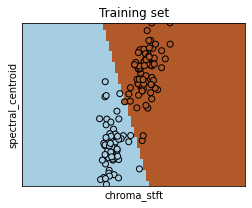

/tmp/ipykernel_4981/2751404703.py:36: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


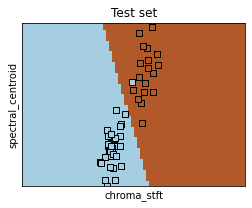

In [18]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].

# NOTICE: This visualization code has been developed for a "standard" solution of the notebook, 
# it could be necessary to make some fixes to adapt to your implementation

h = .02  # step size in the mesh
x_min, x_max = X_reduced[:, 0].min() - .5, X_reduced[:, 0].max() + .5
y_min, y_max = X_reduced[:, 1].min() - .5, X_reduced[:, 1].max() + .5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = logreg.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the training points
plt.scatter(X_training[:, 0], X_training[:, 1], c=Y_training, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Training set')

plt.show()

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(4, 3))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Plot also the test points 
plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_test, edgecolors='k', cmap=plt.cm.Paired, marker='s')
plt.xlabel(feature_name0)
plt.ylabel(feature_name1)

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title('Test set')

plt.show()

# 2) Linear Regression on the Boston House Price dataset

### Dataset description: 

The Boston House Price Dataset involves the prediction of a house price in thousands of dollars given details about the house and its neighborhood.

The dataset contains a total of 500 observations, which relate 13 input features to an output variable (house price).

The variable names are as follows:

CRIM: per capita crime rate by town.

ZN: proportion of residential land zoned for lots over 25,000 sq.ft.

INDUS: proportion of nonretail business acres per town.

CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

NOX: nitric oxides concentration (parts per 10 million).

RM: average number of rooms per dwelling.

AGE: proportion of owner-occupied units built prior to 1940.

DIS: weighted distances to five Boston employment centers.

RAD: index of accessibility to radial highways.

TAX: full-value property-tax rate per $10,000.

PTRATIO: pupil-teacher ratio by town.

B: 1000*(Bk – 0.63)2 where Bk is the proportion of blacks by town.

LSTAT: % lower status of the population.

MEDV: Median value of owner-occupied homes in $1000s.
    

In [19]:
# needed if you get the IPython/javascript error on the in-line plots
%matplotlib nbagg  

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from scipy import stats

In [20]:
# Import Data: Load the data from a .csv file
filename = "data/house.csv"
Data = np.genfromtxt(filename, delimiter=';',skip_header=1)

# A quick overview of data, to inspect the data you can use the method describe()
dataDescription = stats.describe(Data)
print(dataDescription)
print ("\nShape of data array:", Data.shape)

#for more interesting visualization: use Panda!

DescribeResult(nobs=500, minmax=(array([  0.00632,   0.     ,   0.46   ,   0.     ,   0.385  ,   3.561  ,
         2.9    ,   1.1296 ,   1.     , 187.     ,  12.6    ,   0.32   ,
         1.73   ,  50.     ]), array([ 88.9762, 100.    ,  27.74  ,   1.    ,   0.871 ,   8.78  ,
       100.    ,  12.1265,  24.    , 711.    ,  22.    , 396.9   ,
        37.97  , 500.    ])), mean=array([  3.65578576,  11.5       ,  11.13174   ,   0.07      ,
         0.5544514 ,   6.28297   ,  68.4246    ,   3.8119318 ,
         9.642     , 409.624     ,  18.4286    , 356.20804   ,
        12.69874   , 225.68      ]), variance=array([   74.72521949,   548.90581162,    47.61982282,     0.06523046,
           0.01358383,     0.49761833,   799.31416317,     4.46304043,
          75.96175952, 28560.51966333,     4.67663531,  8416.5713729 ,
          51.3361942 ,  8529.82925852]), skewness=array([ 5.17851447,  2.19924065,  0.29469001,  3.37060575,  0.72944382,
        0.40691344, -0.58266003,  0.99061328,  0.98

# Split data in training and test sets



Given $m$ total data, denote with $m_{t}$ the part used for training. Keep $m_t$ data as training data, and $m_{test}:= m-m_{t}$. For instance one can take $m_t=0.7m$ of the data as training and $m_{test}=0.3m$ as testing. Let us define as define

$\bullet$ $S_{t}$ the training data set

$\bullet$ $S_{test}$ the testing data set


The reason for this splitting is as follows:

TRAINING DATA: The training data are used to compute the empirical loss
$$
L_S(h) = \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
which is used to estimate $h$ in a given model class ${\cal H}$.
i.e. 
$$
\hat{h} = {\rm arg\; min}_{h \in {\cal H}} \, L_S(h)
$$

TESTING DATA: The test data set can be used to estimate the performance of the final estimated model
$\hat h_{\hat d_j}$ using:
$$
L_{{\cal D}}(\hat h_{\hat d_j}) \simeq \frac{1}{m_{test}} \sum_{ z_i \in S_{test}} \ell(\hat h_{\hat d_j},z_i)
$$


**TO DO**: split the data in training and test sets (70%-30%)

In [21]:
# get number of total samples
num_total_samples = Data.shape[0]
print ("Total number of samples:", num_total_samples)

m_t = int(num_total_samples*.7)
print ("Cardinality of Training Set:", m_t)

# shuffle the data
np.random.shuffle(Data)

# training data 
X_training = Data[:m_t,:-1]
Y_training = Data[:m_t,-1]
print ("\nTraining input data size:", X_training.shape)
print ("Training output data size:", Y_training.shape)

# test data, to be used to estimate the true loss of the final model(s)
X_test = Data[m_t:,:-1]
Y_test = Data[m_t:,-1]
print ("\nTest input data size:", X_test.shape)
print ("Test output data size:", Y_test.shape)

Total number of samples: 500
Cardinality of Training Set: 350

Training input data size: (350, 13)
Training output data size: (350,)

Test input data size: (150, 13)
Test output data size: (150,)


# Data Normalization
It is common practice in Statistics and Machine Learning to scale the data (= each variable) so that it is centered (zero mean) and has standard deviation equal to 1. This helps in terms of numerical conditioning of the (inverse) problems of estimating the model (the coefficients of the linear regression in this case), as well as to give the same scale to all the coefficients.

In [22]:
# scale the data

# standardize the input matrix
from sklearn import preprocessing
# the transformation is computed on training data and then used on all the 3 sets
scaler = preprocessing.StandardScaler().fit(X_training) 

np.set_printoptions(suppress=True) # sets to zero floating point numbers < min_float_eps
X_training = scaler.transform(X_training)
print ("Mean of the training input data:", X_training.mean(axis=0))
print ("Std of the training input data:",X_training.std(axis=0))

X_test = scaler.transform(X_test) # use the same transformation on test data
print ("Mean of the test input data:", X_test.mean(axis=0))
print ("Std of the test input data:", X_test.std(axis=0))

Mean of the training input data: [-0.  0.  0.  0. -0.  0. -0. -0. -0.  0.  0.  0. -0.]
Std of the training input data: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
Mean of the test input data: [-0.08119001 -0.03284647  0.1002241  -0.1228683   0.01952694  0.12706616
  0.0578048  -0.04626309 -0.00250851  0.03915802  0.01524003  0.00985282
  0.01027508]
Std of the test input data: [0.61278543 0.88382257 1.04976393 0.77747579 0.96538938 0.96889616
 1.03219142 0.99174282 0.99031277 0.99830074 1.0452177  0.98878743
 0.98846949]


# Model Training 

The model is trained (= estimated) minimizing the empirical error
$$
L_S(h) := \frac{1}{m_t} \sum_{z_i \in S_{t}} \ell(h,z_i)
$$
When the loss function is the quadratic loss
$$
\ell(h,z) := (y - h(x))^2
$$
we define  the Residual Sum of Squares (RSS) as
$$
RSS(h):= \sum_{z_i \in S_{t}} \ell(h,z_i) = \sum_{z_i \in S_{t}} (y_i - h(x_i))^2
$$ so that the training error becomes
$$
L_S(h) = \frac{RSS(h)}{m_t}
$$

We recal that, for linear models we have $h(x) = <w,x>$ and the Empirical error $L_S(h)$ can be written
in terms of the vector of parameters $w$ in the form
$$
L_S(w) = \frac{1}{m_t} \|Y - X w\|^2
$$
where $Y$ and $X$ are the matrices whose $i-$th row are, respectively, the output data $y_i$ and the input vectors $x_i^\top$.


 **TO DO:** compute the linear regression coefficients using np.linalg.lstsq from scikitlear 
 

In [23]:
# compute linear regression coefficients for training data

# add a 1 at the beginning of each sample for training, and testing (use homogeneous coordinates)
m_training = X_training.shape[0]
# H: in homogeneous coordinates
X_trainingH = np.hstack((np.ones((m_training,1)),X_training))

m_test = X_test.shape[0]
# H: in homogeneous coordinates
X_testH = np.hstack((np.ones((m_test,1)),X_test))

# compute the least-squares coefficients using linalg.lstsq
w_np, RSStr_np, rank_Xtr, sv_Xtr =  np.linalg.lstsq(X_trainingH, Y_training)
print("LS coefficients with numpy lstsq:", w_np)

# compute Residual sums of squares 
RSStr_hand = np.zeros(1)
for i in range(X_trainingH.shape[0]):
    RSStr_hand += (np.dot(w_np,X_trainingH[i])-Y_training[i])**2

print("\nRSS with numpy lstsq:", RSStr_np)
print("RSS by hand:", RSStr_hand)
print("Empirical risk with numpy lstsq:", RSStr_np/m_training)

# return the coefficient of determination of the prediction R_squared
def numpy_linreg_score(x, y, coefH):
    u = 0
    for i in range(y.shape[0]):
        u += (y[i] - np.dot(coefH,x[i]))**2
    y_mean = np.mean(y)
    v = 0
    for i in range(y.shape[0]):
        v += (y[i] - y_mean)**2
    return 1-(u/v)
              
R_squared = numpy_linreg_score(X_trainingH, Y_training, w_np)
print("\nMeasure on training data by hand:", 1 - R_squared)

LS coefficients with numpy lstsq: [225.5        -11.1236448   14.12810367   3.86276935   6.0545499
 -26.03861529  18.52720767   5.31593615 -34.40890845  28.24846683
 -22.45700097 -22.04698289   7.46620067 -43.19967356]

RSS with numpy lstsq: [830589.09928624]
RSS by hand: [830589.09928624]
Empirical risk with numpy lstsq: [2373.11171225]

Measure on training data by hand: 0.2863397822521263


/tmp/ipykernel_4981/474702769.py:13: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  w_np, RSStr_np, rank_Xtr, sv_Xtr =  np.linalg.lstsq(X_trainingH, Y_training)


## Data prediction 

Compute the output predictions on both training and test set and compute the Residual Sum of Squares (RSS). 

**TO DO**: Compute these quantities on  training and test sets.

In [24]:
# compute predictions on training and test
prediction_training = np.array([np.dot(w_np,X_trainingH[i]) for i in range(X_trainingH.shape[0])])
prediction_test = np.array([np.dot(w_np,X_testH[i]) for i in range(X_testH.shape[0])])

# check prediction on test
accuracy = [abs(Y_test[i] - prediction_test[i])/Y_test[i] for i in range(Y_test.shape[0])]
print("Example of percentage accuracy on test predictions:", accuracy[:5])

# what about the loss for points in the test data?
RSS_test = np.zeros(1)
for i in range(X_testH.shape[0]):
    RSS_test += (np.dot(w_np,X_testH[i])-Y_test[i])**2

print("\nRSS on test data:",  RSS_test)
print("Loss estimated from test data:", RSS_test/m_test)

R_squared = numpy_linreg_score(X_testH, Y_test, w_np)
print("\nMeasure on test data by hand:", 1 - R_squared)

Example of percentage accuracy on test predictions: [0.1579329386455144, 0.31088399402456457, 0.014197983506636817, 0.14063962275892633, 0.11553821328580145]

RSS on test data: [285168.40045413]
Loss estimated from test data: [1901.12266969]

Measure on test data by hand: 0.2103577255494795


### QUESTION 4: Comment on the results you get and on the difference between the train and test errors.

The train error is usually larger than the training error but again the result depends on the seed used for generating the permutations. A larger dataset could lead to a better and more stable result.

## Ordinary Least-Squares using scikit-learn
Another fast way to compute the LS estimate is through sklearn.linear_model (for this function homogeneous coordinates are not needed).

In [26]:
from sklearn import linear_model

# build the LinearRegression() model and train it
LinReg = linear_model.LinearRegression()

LinReg.fit(X_training,Y_training)
print("Intercept:", LinReg.intercept_)
print("Least-Squares Coefficients:", LinReg.coef_)

# predict output values on training and test sets

# return the coefficient of determination of the prediction R_squared implemented by hand
def sklearn_linreg_score(x, y, coef, intercept):
    u = 0
    for i in range(y.shape[0]):
        u += (y[i] - (np.dot(coef,x[i]) + intercept))**2
    y_mean = np.mean(y)
    v = 0
    for i in range(y.shape[0]):
        v += (y[i] - y_mean)**2
    return 1-(u/v)

LinReg.predict(X_training)
R_squared = sklearn_linreg_score(X_training, Y_training, LinReg.coef_, LinReg.intercept_)    
# return a prediction score based on the coefficient of determination
print("\nMeasure on training data by hand:", 1 - R_squared)
print("Measure on training data:", 1 - LinReg.score(X_training, Y_training))

LinReg.predict(X_test)
R_squared = sklearn_linreg_score(X_test, Y_test, LinReg.coef_, LinReg.intercept_) 
# return a prediction score based on the coefficient of determination
print("\nMeasure on training data by hand:", 1 - R_squared)
print("Measure on test data:", 1 - LinReg.score(X_test, Y_test))

Intercept: 225.50000000000034
Least-Squares Coefficients: [-11.1236448   14.12810367   3.86276935   6.0545499  -26.03861529
  18.52720767   5.31593615 -34.40890845  28.24846683 -22.45700097
 -22.04698289   7.46620067 -43.19967356]

Measure on training data by hand: 0.2863397822521261
Measure on training data: 0.2863397822521261

Measure on training data by hand: 0.21035772554947985
Measure on test data: 0.21035772554948007
